# Named Entity Recognition (NER)

By Alberto Valdes.

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

This notebook was devoloped in Google Colab using A100 GPU.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Explanation:

Named Entity Recognition (NER) is a technique in natural language processing (NLP) that focuses on identifying and classifying entities. The purpose of NER is to automatically extract structured information from unstructured text, enabling machines to understand and categorize entities in a meaningful manner for various applications like text summarization, building knowledge graphs, question answering, and knowledge graph construction.

$ $

**What is Named Entity Recognition (NER)?**

$ $

Name-entity recognition (NER) is also referred to as entity identification, entity chunking, and entity extraction. NER is the component of information extraction that aims to identify and categorize named entities within unstructured text. NER involves the identification of key information in the text and classification into a set of predefined categories. An entity is the thing that is consistently talked about or refer to in the text, such as person names, organizations, locations, time expressions, quantities, percentages and more predefined categories.


# Named Entity Recognition (NER) Methods

**Lexicon Based Method**

The NER uses a dictionary with a list of words or terms. The process involves checking if any of these words are present in a given text. However, this approach isn’t commonly used because it requires constant updating and careful maintenance of the dictionary to stay accurate and effective.

$ $

**Rule Based Method**

The Rule Based NER method uses a set of predefined rules guides the extraction of information. These rules are based on patterns and context. Pattern-based rules focus on the structure and form of words, looking at their morphological patterns. On the other hand, context-based rules consider the surrounding words or the context in which a word appears within the text document. This combination of pattern-based and context-based rules enhances the precision of information extraction in Named Entity Recognition (NER).

$ $

**Machine Learning-Based Method**

_Multi-Class Classification with Machine Learning Algorithms:_ One way is to train the model for multi-class classification using different machine learning algorithms, but it requires a lot of labelling. In addition to labelling the model also requires a deep understanding of context to deal with the ambiguity of the sentences. This makes it a challenging task for a simple machine learning algorithm.

_Conditional Random Field (CRF):_ Conditional random field is implemented by both NLP Speech Tagger and NLTK.  It is a probabilistic model that can be used to model sequential data such as words.

$ $

**Deep Learning Based Method**

Deep learning NER system is much more accurate than previous method, as it is capable to assemble words. This is due to the fact that it used a method called word embedding, that is capable of understanding the semantic and syntactic relationship between various words.


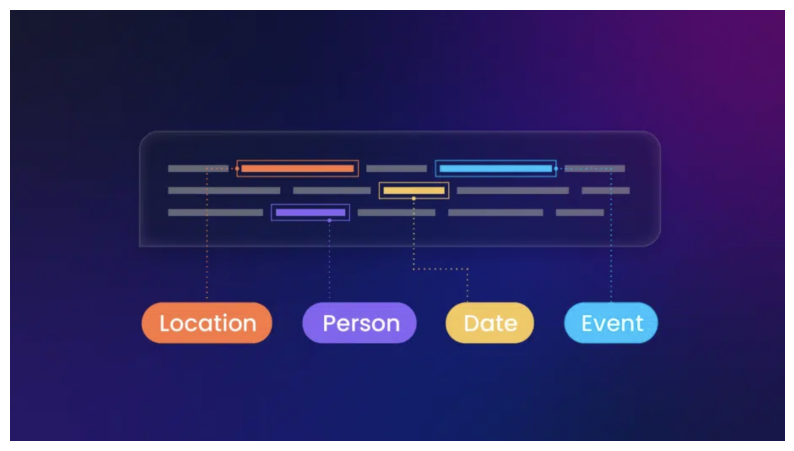

In [4]:
display_img('NER.png', 10, 10)

In [5]:
start = time.time()

# Execution

In [6]:
!pip install spacy

In [7]:
!pip install nltk

In [8]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import pandas as pd
import spacy
import requests
from bs4 import BeautifulSoup

In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
pd.set_option("display.max_rows", 200)

### NER using Spacy

In [12]:
content = "Trinamool Congress leader Mahua Moitra has moved the Supreme Court against her expulsion from the Lok Sabha over the cash-for-query allegations against her. Moitra was ousted from the Parliament last week after the Ethics Committee of the Lok Sabha found her guilty of jeopardising national security by sharing her parliamentary portal's login credentials with businessman Darshan Hiranandani."

doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Congress 10 18 ORG
Mahua Moitra 26 38 PERSON
the Supreme Court 49 66 ORG
the Lok Sabha 94 107 PERSON
Moitra 157 163 ORG
Parliament 184 194 ORG
last week 195 204 DATE
the Ethics Committee 211 231 ORG
Darshan Hiranandani 373 392 PERSON


In [13]:
from spacy import displacy
displacy.render(doc, style="ent")

In [14]:
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])

In [15]:
print(df)

                   text    type                 lemma
0              Congress     ORG              Congress
1          Mahua Moitra  PERSON          Mahua Moitra
2     the Supreme Court     ORG     the Supreme Court
3         the Lok Sabha  PERSON         the Lok Sabha
4                Moitra     ORG                Moitra
5            Parliament     ORG            Parliament
6             last week    DATE             last week
7  the Ethics Committee     ORG  the Ethics Committee
8   Darshan Hiranandani  PERSON   Darshan Hiranandani


### Time of execution

In [16]:
end = time.time()

In [17]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 52 seconds.
